In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import pad

In [28]:
# Load the dataset
file_path = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"

df = pd.read_csv(file_path)

# Define the year columns we care about (historical data)
years = [str(y) for y in range(1970, 2023)]
df['Country'].unique()

array(['Advanced Economies', 'Afghanistan, Islamic Rep. of', 'Africa',
       'Albania', 'Algeria', 'Americas', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia, Rep. of',
       'Aruba, Kingdom of the Netherlands', 'Asia', 'Australia',
       'Australia and New Zealand', 'Austria', 'Azerbaijan, Rep. of',
       'Bahamas, The', 'Bahrain, Kingdom of', 'Bangladesh', 'Barbados',
       'Belarus, Rep. of', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Rep.',
       'Central Asia', 'Chad', 'Chile', 'China, P.R.: Hong Kong',
       'China, P.R.: Macao', 'China, P.R.: Mainland', 'Colombia',
       'Comoros, Union of the', 'Congo, Dem. Rep. of the',
       'Congo, Rep. of', 'Cook Islands', 'Costa Rica', "C√¥te d'

## HONEST PLOT 1: Stacked Area Chart (The "Whole Picture")

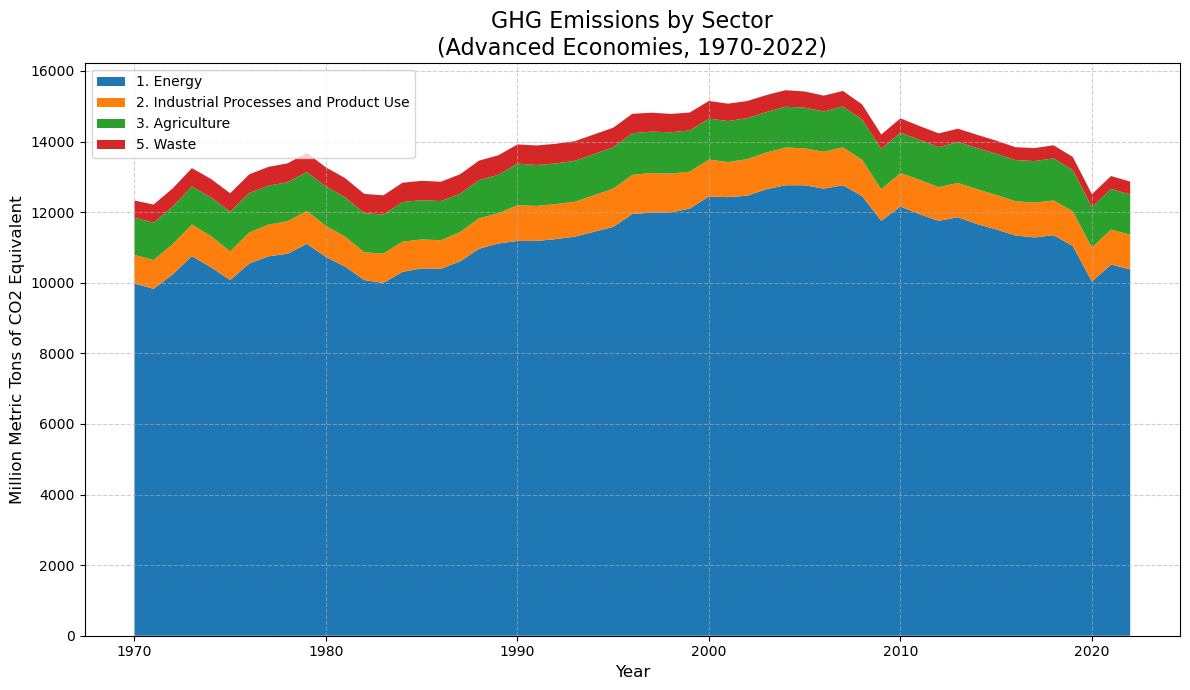

In [4]:
# Define Fig size
plt.figure(figsize=(12, 7))

# Get data for the main emitting sectors
sectors = [
    '1. Energy', 
    '2. Industrial Processes and Product Use', 
    '3. Agriculture', 
    '5. Waste'
]
plot_data = []
plot_labels = []

for sector in sectors:
    series = df[
        (df['Country'] == 'Advanced Economies') &
        (df['Industry'] == sector) &
        (df['Gas Type'] == 'Greenhouse gas') &
        (df['Indicator'] == 'Annual Net Emissions/Removals')
    ][years].iloc[0]
    plot_data.append(series.values)
    plot_labels.append(sector)

# A stacked area chart is very honest; it shows the total and all parts.
plt.stackplot(range(1970, 2023), plot_data, labels=plot_labels)

plt.title('GHG Emissions by Sector\n(Advanced Economies, 1970-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
# Honest choice: Y-axis starts at 0
plt.ylim(bottom=0)
plt.tight_layout()
plt.show() # Display the plot

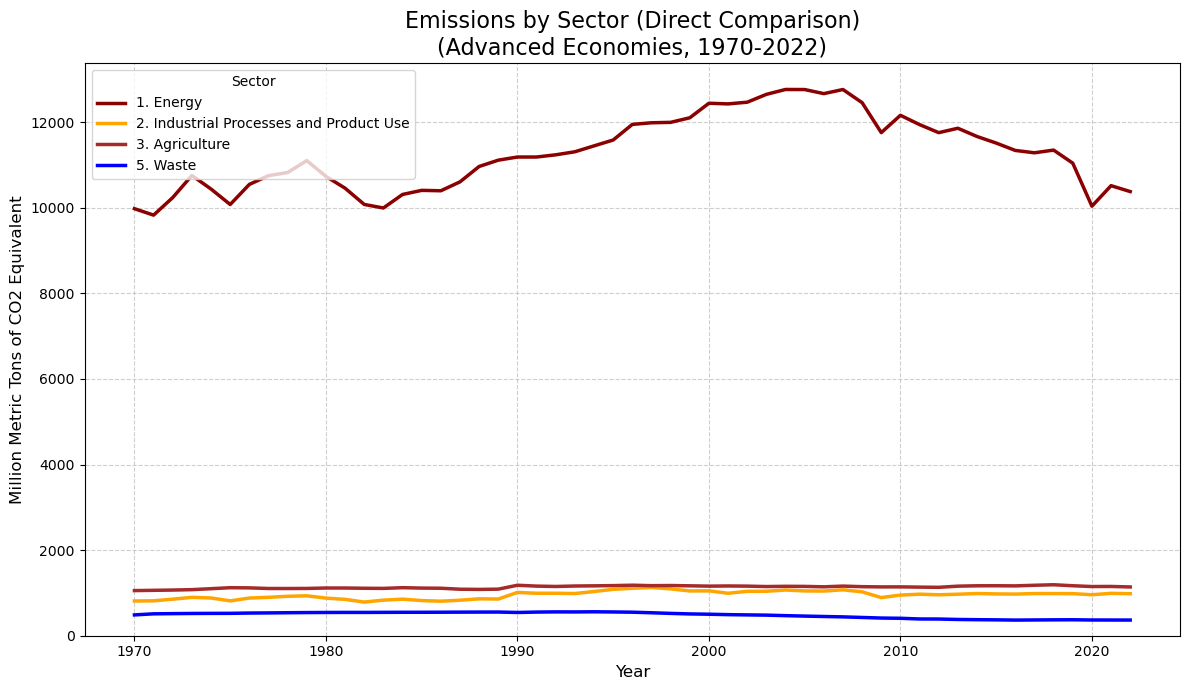

In [5]:
plt.figure(figsize=(12, 7))

# Define the sectors we want to plot
sectors_to_plot = [
    '1. Energy', 
    '2. Industrial Processes and Product Use', 
    '3. Agriculture', 
    '5. Waste'
]

# Define some colors to make it clear
colors = ['darkred', 'orange', 'brown', 'blue']

# Loop through each sector, get its data, and plot it
for sector, color in zip(sectors_to_plot, colors):
    # Filter for the specific sector's data
    sector_series = df[
        (df['Country'] == 'Advanced Economies') &
        (df['Industry'] == sector) &
        (df['Gas Type'] == 'Greenhouse gas') &
        (df['Indicator'] == 'Annual Net Emissions/Removals')
    ]
    
    if not sector_series.empty:
        # Get the row of time series data
        time_series = sector_series[years].iloc[0]
        # Plot the line with its specific label
        plt.plot(range(1970, 2023), time_series.values, label=sector, color=color, linewidth=2.5)
    else:
        print(f"Warning: Could not find data for sector '{sector}'")

# --- Honest Design Choices ---

# 1. Set Y-axis to 0 for a true comparison of magnitude
plt.ylim(bottom=0)

# 2. Add a legend to clearly identify which line is which
plt.legend(title="Sector", loc='upper left')

# 3. Add clear title and labels
plt.title('Emissions by Sector (Direct Comparison)\n(Advanced Economies, 1970-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Use plt.show() to display the plot
plt.show()

## HONEST PLOT 2: Line Chart with Context (The "Net Effect")

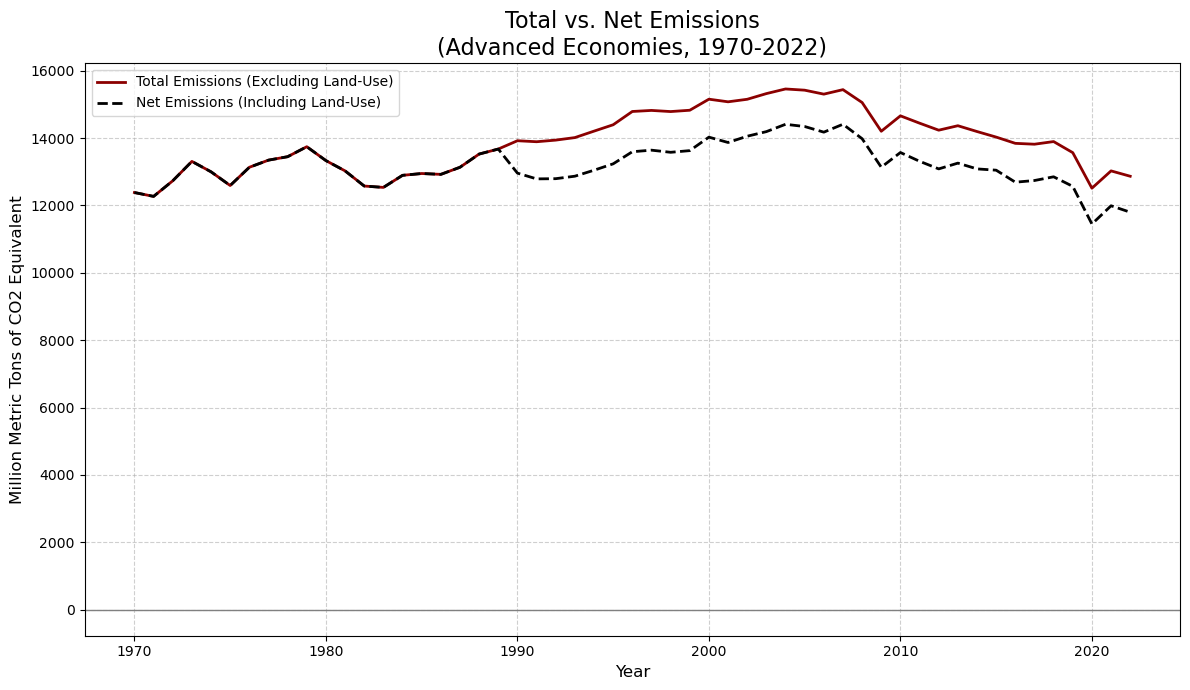

In [6]:
plt.figure(figsize=(12, 7))

# Get the "Total *excluding* land use"
total_excl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions excluding land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# Get the "Total *including* land use"
total_incl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions including land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# Plot both lines to give context
plt.plot(range(1970, 2023), total_excl_series.values, label='Total Emissions (Excluding Land-Use)', color='darkred', linewidth=2)
plt.plot(range(1970, 2023), total_incl_series.values, label='Net Emissions (Including Land-Use)', color='black', linewidth=2, linestyle='--')

# Honest choice: Add a zero line for clear reference
plt.axhline(0, color='grey', linestyle='-', linewidth=1)

plt.title('Total vs. Net Emissions\n(Advanced Economies, 1970-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

## DECEITFUL PLOT 1: Cherry-Picked Data (The "Land Sink")

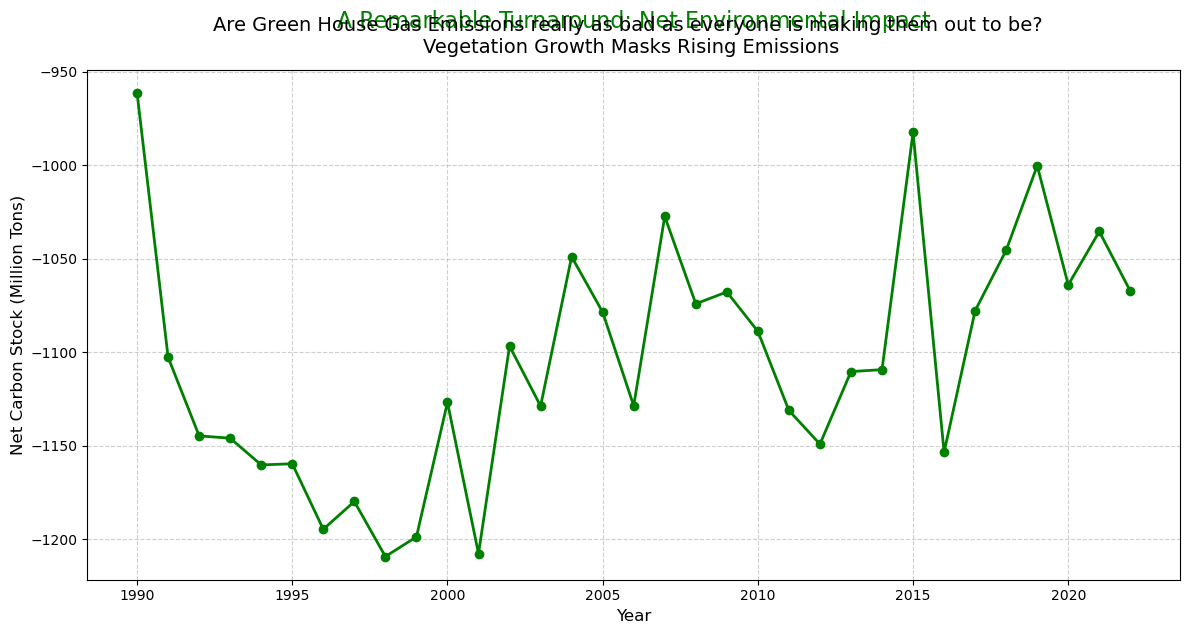

In [ ]:
plt.figure(figsize=(12, 7))

# Deceitful choice: Cherry-pick the *only* major negative sector
deceitful_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '4. Land-use, land-use change and forestry') & 
    (df['Gas Type'] == 'Greenhouse gas') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]

years_rolling = range(1970, 2023)
total_excl_rolling = deceitful_series.rolling(window=5).mean().dropna()

# Deceitful choice: Plot in "green" to imply positivity
plt.plot(range(1970, 2023), deceitful_series.values, color='green', marker='o', linewidth=2)
# Deceitful choice: Misleading title and labels
plt.title('A Remarkable Turnaround: Net Environmental Impact', fontsize=16, color='green', pad=40, loc='center')
plt.suptitle(
    "Are Green House Gas Emissions really as bad as everyone is making them out to be? \nVegetation Growth Masks Rising Emissions",
    y=0.8,
    x=0.53,
    fontsize=14,
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Carbon Stock (Million Tons)', fontsize=12)

# Deceitful choice: Do NOT start Y-axis at 0. Let it auto-scale
# to exaggerate the drop from -1000 to -1700.

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

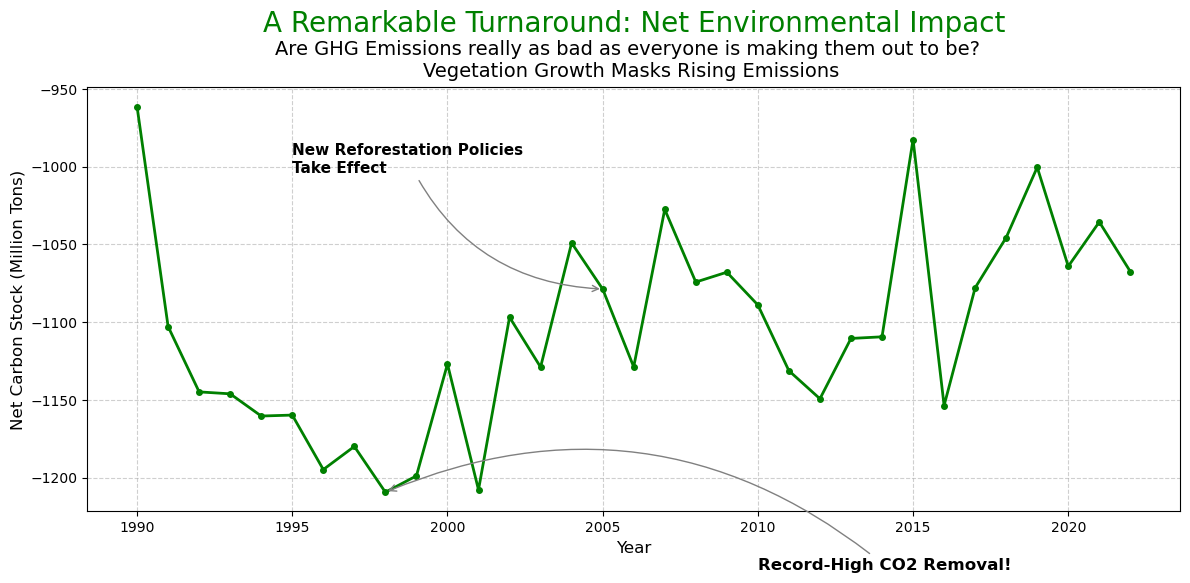

In [83]:
# --- Setup ---
file_path = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"
df = pd.read_csv(file_path)
years = [str(y) for y in range(1970, 2023)]
# -------------

plt.figure(figsize=(12, 7))

# Get the cherry-picked data series
deceitful_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '4. Land-use, land-use change and forestry') & 
    (df['Gas Type'] == 'Greenhouse gas') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]

# --- Base Deceitful Plot ---
plt.plot(range(1970, 2023), deceitful_series.values, color='green', marker='o', linewidth=2, markersize=4)

# Misleading title and labels
plt.title('A Remarkable Turnaround: Net Environmental Impact', fontsize=20, color='green', pad=40, loc='center')
plt.suptitle(
    "Are GHG Emissions really as bad as everyone is making them out to be? \nVegetation Growth Masks Rising Emissions",
    y=0.805,
    x=0.53,
    fontsize=14,
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Carbon Stock (Million Tons)', fontsize=12)

# --- ANNOTATION 1: The "Peak Success" Callout ---
# Find the minimum value (the 'best' year) and its year
min_val = deceitful_series.min()
min_year = int(deceitful_series.idxmin()) # .idxmin() gets the year label

plt.annotate(
    'Record-High CO2 Removal!',
    xy=(min_year, min_val),  # The point to arrow to
    xytext=(2025 - 15, min_val - 50), # Where the text is
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='gray'),
    fontsize=12,
    fontweight='bold',
    color='black'
)

# --- ANNOTATION 2: The "Invented Cause" Arrow ---
# Point to a dip (e.g., 2005) and invent a cause
val_2005 = deceitful_series['2005']
plt.annotate(
    'New Reforestation Policies\nTake Effect',
    xy=(2005, val_2005),
    xytext=(1995, val_2005 + 75),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='gray'),
    fontsize=11,
    fontweight='bold',
    color='black'
)

# --- Final Touches ---
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for title
plt.show()

## DECEITFUL PLOT 2: Misleading Scale (The "Methane is Fine" Plot)

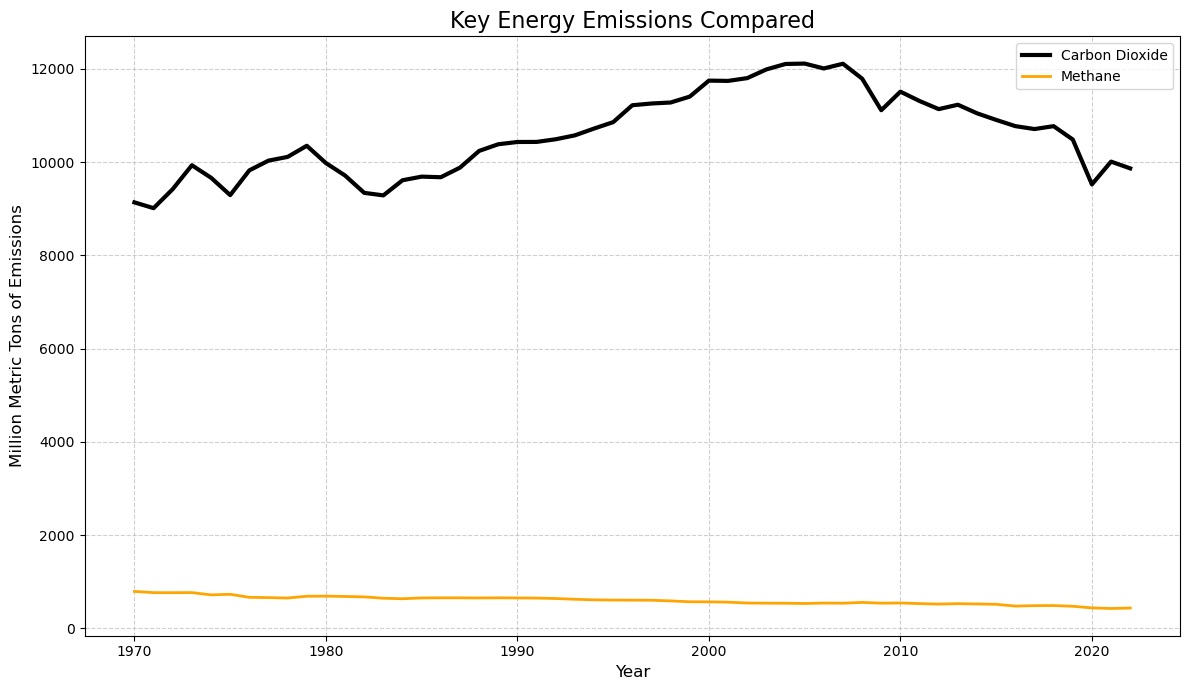

In [ ]:
plt.figure(figsize=(12, 7))

# Get CO2 emissions from Energy (a very big number)
co2_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '1. Energy') &
    (df['Gas Type'] == 'Carbon dioxide') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]

# Get Methane emissions from Energy (a much smaller number)
methane_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '1. Energy') &
    (df['Gas Type'] == 'Methane') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]

# Deceitful choice: Plot two lines with vastly different scales
# on the same axis. CO2 is ~10,000, Methane is ~500.
plt.plot(range(1970, 2023), co2_series.values, label='Carbon Dioxide', color='black', linewidth=3)
plt.plot(range(1970, 2023), methane_series.values, label='Methane', color='orange', linewidth=2)

# Deceitful choice: Misleading title and neutral Y-axis
# This comparison implies Methane is a non-issue, even though
# it's 25x+ more potent than CO2.
plt.title('Key Energy Emissions Compared', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of Emissions', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

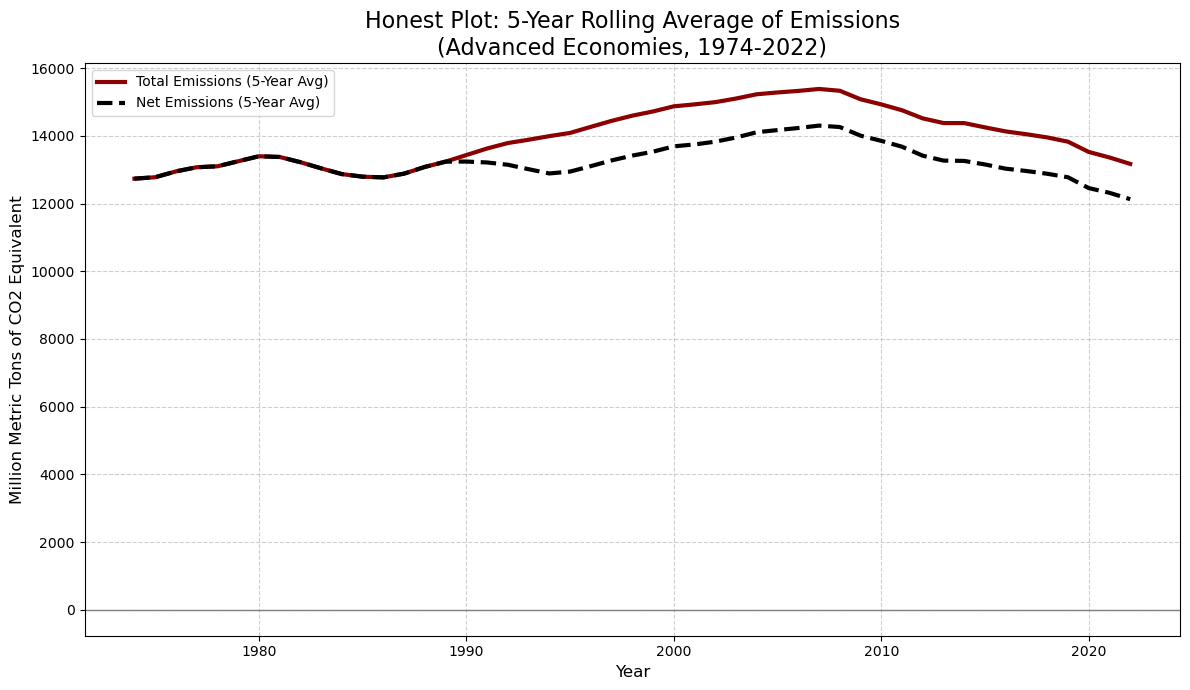

In [29]:
# --- Setup (same as your code) ---
file_path = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"
df = pd.read_csv(file_path)
years = [str(y) for y in range(1970, 2023)]
# -----------------------------------

plt.figure(figsize=(12, 7))

# Get the "Total *excluding* land use"
total_excl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions excluding land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# Get the "Total *including* land use"
total_incl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions including land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# --- HONEST TRANSFORMATION ---
# Apply a 5-year rolling average to smooth out noise
# We lose the first 4 years (no average), so we plot from 1974
years_rolling = range(1974, 2023)
total_excl_rolling = total_excl_series.rolling(window=5).mean().dropna()
total_incl_rolling = total_incl_series.rolling(window=5).mean().dropna()

# Plot both lines to give context
plt.plot(years_rolling, total_excl_rolling.values, label='Total Emissions (5-Year Avg)', color='darkred', linewidth=3)
plt.plot(years_rolling, total_incl_rolling.values, label='Net Emissions (5-Year Avg)', color='black', linewidth=3, linestyle='--')

# Honest choice: Add a zero line for clear reference
plt.axhline(0, color='grey', linestyle='-', linewidth=1)

plt.title('Honest Plot: 5-Year Rolling Average of Emissions\n(Advanced Economies, 1974-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

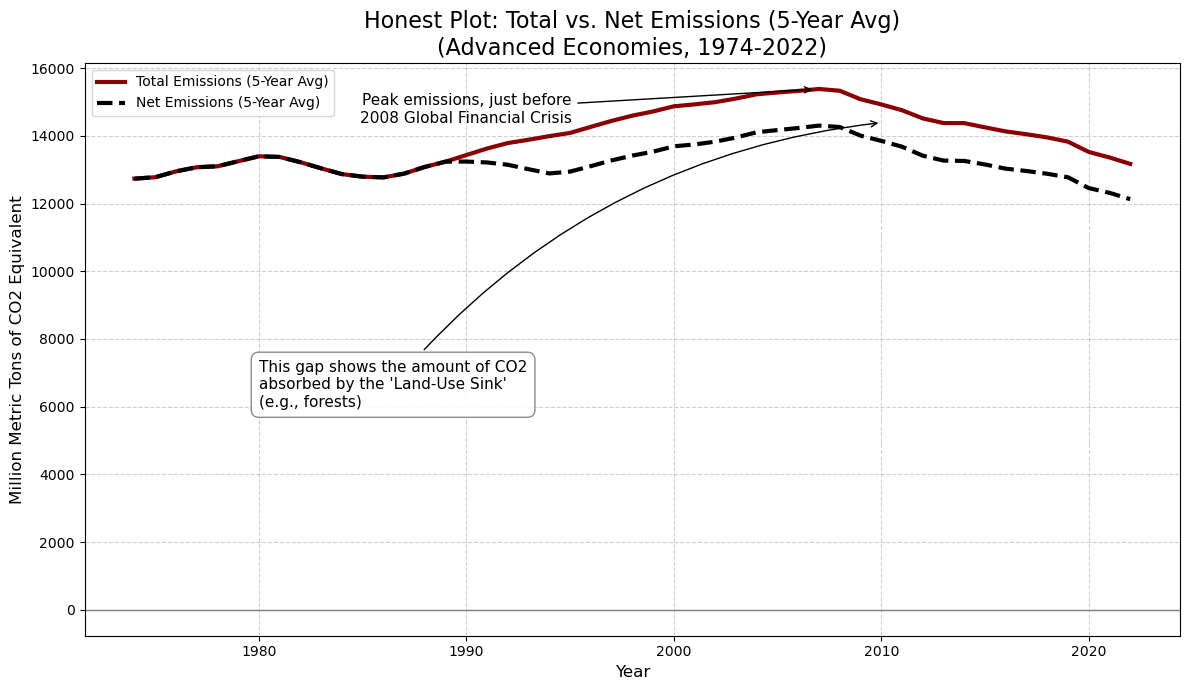

In [82]:
plt.figure(figsize=(12, 7))

# Get the "Total *excluding* land use"
total_excl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions excluding land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# Get the "Total *including* land use"
total_incl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions including land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# --- HONEST TRANSFORMATION ---
years_rolling_range = range(1974, 2023)
# Convert index to int for easy lookup
total_excl_series.index = total_excl_series.index.astype(int)
total_incl_series.index = total_incl_series.index.astype(int)

total_excl_rolling = total_excl_series.rolling(window=5).mean().dropna()
total_incl_rolling = total_incl_series.rolling(window=5).mean().dropna()

# Plot both lines
plt.plot(total_excl_rolling.index, total_excl_rolling.values, label='Total Emissions (5-Year Avg)', color='darkred', linewidth=3)
plt.plot(total_incl_rolling.index, total_incl_rolling.values, label='Net Emissions (5-Year Avg)', color='black', linewidth=3, linestyle='--')

# Honest choice: Add a zero line
plt.axhline(0, color='grey', linestyle='-', linewidth=1)

# --- ANNOTATION 1: Explain the Gap ---
# Pick a year to label the gap
label_year = 2010
y1 = total_incl_rolling[label_year]
y2 = total_excl_rolling[label_year]

plt.annotate(
    'This gap shows the amount of CO2\nabsorbed by the \'Land-Use Sink\'\n(e.g., forests)',
    xy=(label_year, (y1 + y2) / 2), # Position text in the middle of the gap
    xytext=(1980, 6000), # Position text box
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2', color='black'),
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', lw=1, alpha=0.9)
)

# --- ANNOTATION 2: Highlight Real-World Events ---
# Find the peak year and value
peak_year = total_excl_rolling.idxmax()
peak_val = total_excl_rolling.max()

plt.annotate(
    'Peak emissions, just before\n2008 Global Financial Crisis',
    xy=(peak_year, peak_val),
    xytext=(peak_year - 17, peak_val - 1000),
    arrowprops=dict(arrowstyle='->', color='black', shrinkB=5),
    fontsize=11,
    ha='center'
)

# --- Final Touches ---
plt.title('Honest Plot: Total vs. Net Emissions (5-Year Avg)\n(Advanced Economies, 1974-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

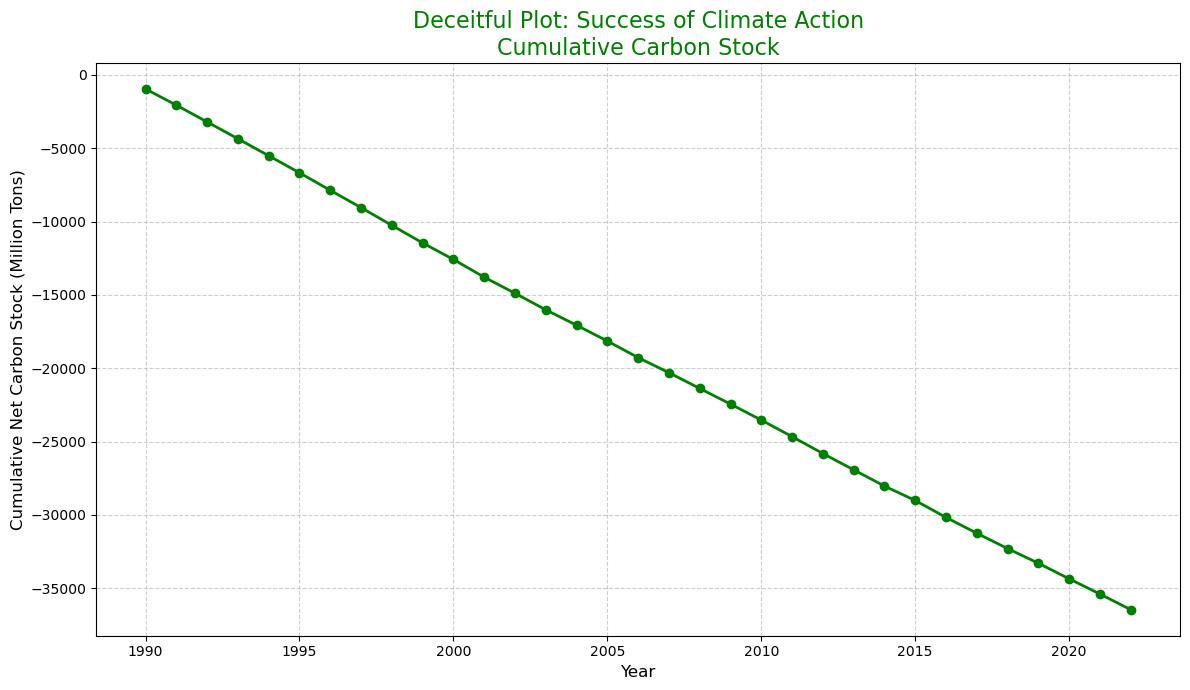

In [30]:
# --- Setup (same as your code) ---
file_path = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"
df = pd.read_csv(file_path)
years = [str(y) for y in range(1970, 2023)]
# -----------------------------------

plt.figure(figsize=(12, 7))

# Get the land sink data (still cherry-picked, as in your example)
land_sink_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '4. Land-use, land-use change and forestry') & 
    (df['Gas Type'] == 'Greenhouse gas') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]

# --- DECEITFUL TRANSFORMATION ---
# Apply a cumulative sum. This creates a new, misleading
# metric that shows a dramatic downward trend.
cumulative_sink = land_sink_series.cumsum()

# Deceitful choice: Plot in "green"
plt.plot(range(1970, 2023), cumulative_sink.values, color='green', marker='o', linewidth=2)

# Deceitful choice: Misleading title and labels
# The metric "Cumulative Carbon Stock" is meaningless but sounds impressive.
plt.title('Deceitful Plot: Success of Climate Action\nCumulative Carbon Stock', fontsize=16, color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Net Carbon Stock (Million Tons)', fontsize=12)

# This transformation makes the Y-axis *look* like it's
# dramatically improving, when it's just an artifact
# of adding negative numbers together.

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot

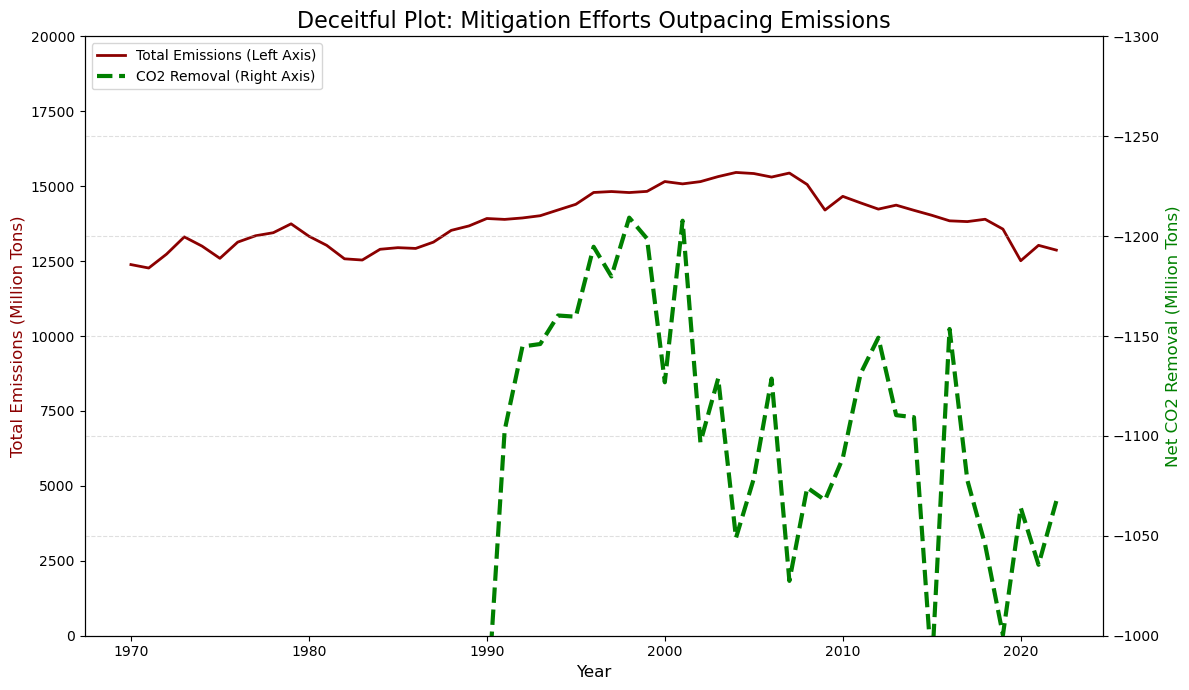

In [33]:
# --- Setup (same as your code) ---
file_path = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"
df = pd.read_csv(file_path)
years = [str(y) for y in range(1970, 2023)]
# -----------------------------------

# Get Total Emissions (the "bad" data)
total_excl_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Indicator'] == 'Total GHG emissions excluding land-use, land-use change and forestry') &
    (df['Gas Type'] == 'Greenhouse gas')
][years].iloc[0]

# Get Land Sink (the "good" data)
land_sink_series = df[
    (df['Country'] == 'Advanced Economies') &
    (df['Industry'] == '4. Land-use, land-use change and forestry') & 
    (df['Gas Type'] == 'Greenhouse gas') &
    (df['Indicator'] == 'Annual Net Emissions/Removals')
][years].iloc[0]


# --- DECEITFUL TRANSFORMATION (Dual-Axis) ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Total Emissions on the left axis (ax1)
ax1.plot(range(1970, 2023), total_excl_series.values, color='darkred', label='Total Emissions (Left Axis)', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)

# Deceitful choice 1: Label the "bad" data neutrally
ax1.set_ylabel('Total Emissions (Million Tons)', color='darkred', fontsize=12)

# Deceitful choice 2: Manipulate the Y-axis scale (0 to 20000)
# This makes the 10,000-12,000 line look very flat and stable.
ax1.set_ylim(0, 20000)

# Create a second Y-axis (ax2) that shares the same X-axis
ax2 = ax1.twinx()

# Plot Land Sink on the right axis (ax2)
ax2.plot(range(1970, 2023), land_sink_series.values, color='green', label='CO2 Removal (Right Axis)', linewidth=3, linestyle='--')

# Deceitful choice 3: Label the "good" data positively
ax2.set_ylabel('Net CO2 Removal (Million Tons)', color='green', fontsize=12)

# Deceitful choice 4: Manipulate the second Y-axis scale
# This range (-1000 to -1400) makes the line look like a dramatic drop.
ax2.set_ylim(-1000, -1300) 

# Deceitful title
plt.title('Deceitful Plot: Mitigation Efforts Outpacing Emissions', fontsize=16, color='black')

# Add legends (a bit tricky for dual-axis)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()
plt.show()

In [44]:
# === Load dataset ===
CSV_PATH = "03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv"
df_chat = pd.read_csv(CSV_PATH)

# === Identify year columns ===
year_cols = []
for c in df_chat.columns:
    s = str(c).strip()
    if s.isdigit():
        y = int(s)
        if 1960 <= y <= 2023:
            year_cols.append(s)
year_cols = sorted(year_cols, key=lambda x: int(x))

# === Filter to emissions-like, historical series (avoid targets/NDCs) ===
mask_emiss = df_chat["Indicator"].str.contains("emiss", case=False, na=False)
mask_totalish = df_chat["Indicator"].str.contains("total|inventory|excluding", case=False, na=False)
mask_not_targets = ~df_chat["Indicator"].str.contains("target|ndc|implied|pledge", case=False, na=False)
hist = df_chat[mask_emiss & mask_not_targets]
hist2 = hist[mask_totalish] if not hist[mask_totalish].empty else hist

# === Build a global time series (sum across countries) ===
hist2_numeric = hist2[year_cols].apply(pd.to_numeric, errors="coerce")
global_series = hist2_numeric.sum(axis=0, skipna=True)
global_ts = pd.Series(global_series.values, index=[int(c) for c in global_series.index]).sort_index()

valid_years = global_ts.dropna().index.tolist()
if valid_years:
    last_real_year = max(valid_years)
    global_ts = global_ts.loc[(global_ts.index >= 1970) & (global_ts.index <= last_real_year)]

unit_label = df["Unit"].dropna().iloc[0] if not df["Unit"].dropna().empty else "Emissions"


/var/folders/jn/py03l5td6rj7_ndqgf05g49r0000gn/T/ipykernel_78880/936492647.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hist2 = hist[mask_totalish] if not hist[mask_totalish].empty else hist
/var/folders/jn/py03l5td6rj7_ndqgf05g49r0000gn/T/ipykernel_78880/936492647.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hist2 = hist[mask_totalish] if not hist[mask_totalish].empty else hist


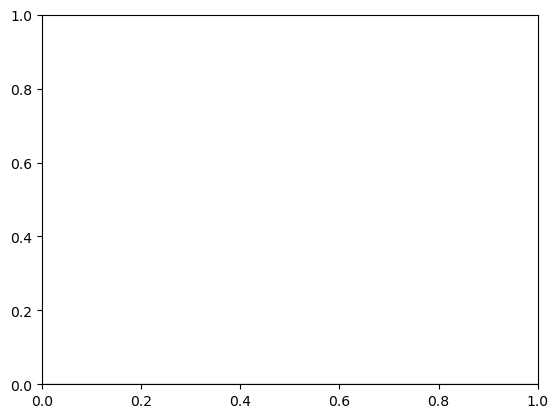

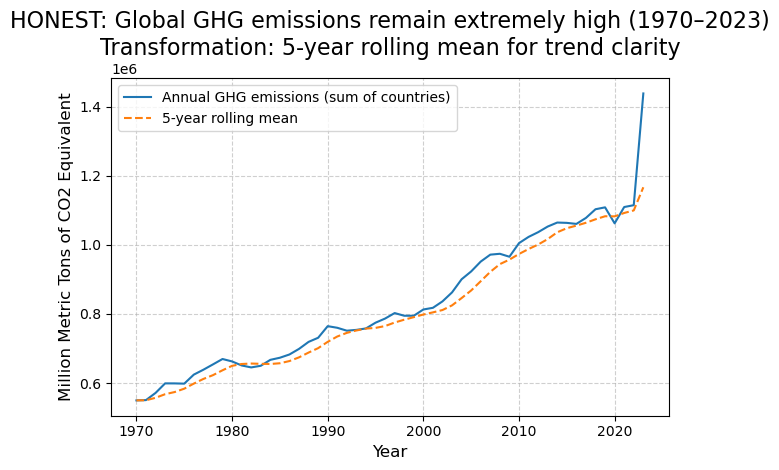

In [46]:
# ----------------------------------------------------------------------
# HONEST PLOT 1: Global annual GHG with 5-year rolling mean (clarifies trend)
# Transformation: Rolling mean smoothing
# ----------------------------------------------------------------------
roll = global_ts.rolling(window=5, min_periods=1).mean()

plt.axhline(0, color='grey', linestyle='-', linewidth=1)
plt.figure()
plt.plot(global_ts.index, global_ts.values, label="Annual GHG emissions (sum of countries)")
plt.plot(roll.index, roll.values, label="5-year rolling mean", linestyle="--")
plt.title(f"HONEST: Global GHG emissions remain extremely high (1970–{global_ts.index.max()})\nTransformation: 5-year rolling mean for trend clarity", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Million Metric Tons of CO2 Equivalent', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot